In [1]:
import os

#add the root directory
os.chdir('../')

<h2> Visualize the Dhat curve for the heuristic and optimized PV

In [2]:
import numpy as np
import pickle
from PCAfold import plot_normalized_variance_comparison, normalized_variance_derivative, cost_function_normalized_variance_derivative
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.cm as cm
from scipy.signal import find_peaks
from PCAfold.preprocess import center_scale

In [3]:
path_variance = "data-files/costs/"
name_optimized = "variance_Tr35a_s3-bw_-6_2_100.npy"
name_heuristic = "variance_Xu-bw_-6_2_100-dataset_low.npy"

name_optimized_fl = "variance_Tr35a_s3-bw_-6_2_100-dataset_flamelet.npy"
name_heuristic_fl = "variance_Xu-bw_-6_2_100-dataset_flamelet.npy"

name_optimized_0D = "variance_Tr0D-2q_s0-bw_-6_2_100-dataset_autoignition.npy"
name_heuristic_0D = "variance_Xu-bw_-6_2_100-dataset_autoignition.npy"

penalty_function = 'log-sigma-over-peak'
power = 4
vertical_shift = 1

keys = ['H2O2', 'H2O', 'H2', 'HO2', 'N2O', 'NO2', 'NO', 'O2', 'OH', 'T', 'PV1']

<h3> DNS dataset

In [4]:
variance_optimized = np.load(f"{path_variance}{name_optimized}", allow_pickle=True).item()
variance_heuristic = np.load(f"{path_variance}{name_heuristic}", allow_pickle=True).item()

(derivative_optimized, bandwidth_values_optimized, max_derivative_optimized) = normalized_variance_derivative(variance_optimized)
(derivative_heuristic, bandwidth_values_heuristic, max_derivative_heuristic) = normalized_variance_derivative(variance_heuristic)

costsOptimized = cost_function_normalized_variance_derivative(variance_optimized,
                                                            penalty_function=penalty_function,
                                                            power=power,
                                                            vertical_shift=vertical_shift,
                                                            norm=None)
costsHeuristic = cost_function_normalized_variance_derivative(variance_heuristic,
                                                            penalty_function=penalty_function,
                                                            power=power,
                                                            vertical_shift=vertical_shift,
                                                            norm=None)

Combined plot

C:\Windows\Temp\ipykernel_21896\431853375.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  greys = cm.get_cmap('Greys')


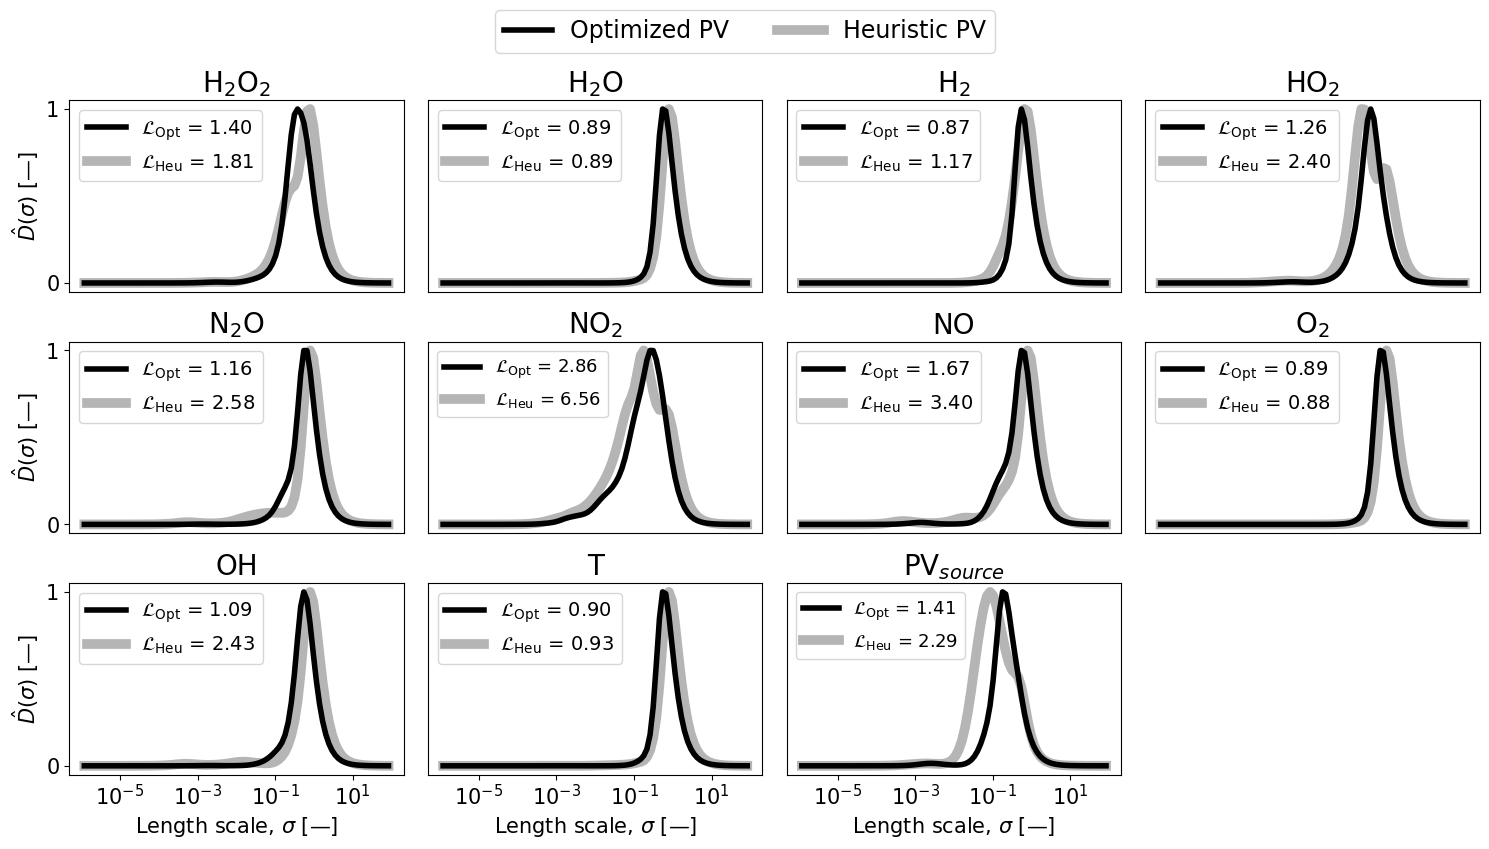

In [5]:
rows, cols = 3,4

save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Comparison Xu vs optimized/Dhat plots - DNS/"
name = "Dhat heuristic vs optimized PV - combined - DNS - with cost - with = - black.png"
namePdf = "Dhat heuristic vs optimized PV - combined - DNS - with cost - with = - black.pdf"

greys = cm.get_cmap('Greys')
keys = ['H2O2', 'H2O', 'H2', 'HO2', 'N2O', 'NO2', 'NO', 'O2', 'OH', 'T', 'PV1']

fig, axes = plt.subplots(rows, cols, figsize=(15, 8))  # Define the grid
axes = axes.flatten()
for i, key in enumerate(keys):
    ax = axes[i]
    ax.plot(bandwidth_values_optimized, derivative_optimized[key], color = greys(1.0), zorder = 2,
            label=rf'$\mathcal{{L}}_{{\mathrm{{Opt}}}}$ = {costsOptimized[i]:.2f}', linewidth = 4)
    ax.plot(bandwidth_values_heuristic, derivative_heuristic[key], color = greys(0.4), zorder = 1,
            label=rf'$\mathcal{{L}}_{{\mathrm{{Heu}}}}$ = {costsHeuristic[i]:.2f}', linewidth = 7, linestyle = "-")
    ax.set_xscale("log")
    if(i>len(keys)-cols):
        ax.tick_params(axis="x", labelsize=15)
        ax.set_xlabel(r"Length scale, $\sigma$"+ " [\u2014]", fontsize = 15)
    else:
        ax.set_xticks([])
    if(i%cols == 0):
        ax.set_yticks([0, 1])
        ax.set_ylabel(r"$\hat{D}(\sigma)$" + " [\u2014]", fontsize = 15)
    else:
        ax.set_yticks([])
    ax.tick_params(axis="y", labelsize=15)
    
    if(key in ["NO2", "PV1"]):
         ax.legend(fontsize = 13)
    else:
         ax.legend(fontsize = 14)

    key = key.replace("2", "$_{2}$").replace("1", "$_{source}$")
    ax.set_title(rf"{key}", fontsize=20)

for j in range(len(keys), len(axes)): #disables axes of plots not used
    axes[j].axis("off")

handles, _ = axes[0].get_legend_handles_labels()
labels = ["Optimized PV", "Heuristic PV"]

fig.legend(
    handles=handles,
    labels = labels,
    fontsize=17,
    loc="upper center",
    ncol=2,
    bbox_to_anchor=(0.5, 1.07)
)

plt.tight_layout()
if(save):
        plt.savefig(f"{pathSave}{name}", dpi = 300, bbox_inches="tight")
        plt.savefig(f"{pathSave}{namePdf}", bbox_inches="tight")
plt.show()

<h3> Flamelet

In [6]:
variance_optimized_fl = np.load(f"{path_variance}{name_optimized_fl}", allow_pickle=True).item()
variance_heuristic_fl = np.load(f"{path_variance}{name_heuristic_fl}", allow_pickle=True).item()

(derivative_optimized_fl, bandwidth_values_optimized_fl, max_derivative_optimized_fl) = normalized_variance_derivative(variance_optimized_fl)
(derivative_heuristic_fl, bandwidth_values_heuristic_fl, max_derivative_heuristic_fl) = normalized_variance_derivative(variance_heuristic_fl)

costsOptimized_fl = cost_function_normalized_variance_derivative(variance_optimized_fl,
                                                            penalty_function=penalty_function,
                                                            power=power,
                                                            vertical_shift=vertical_shift,
                                                            norm=None)
costsHeuristic_fl = cost_function_normalized_variance_derivative(variance_heuristic_fl,
                                                            penalty_function=penalty_function,
                                                            power=power,
                                                            vertical_shift=vertical_shift,
                                                            norm=None)

Combined

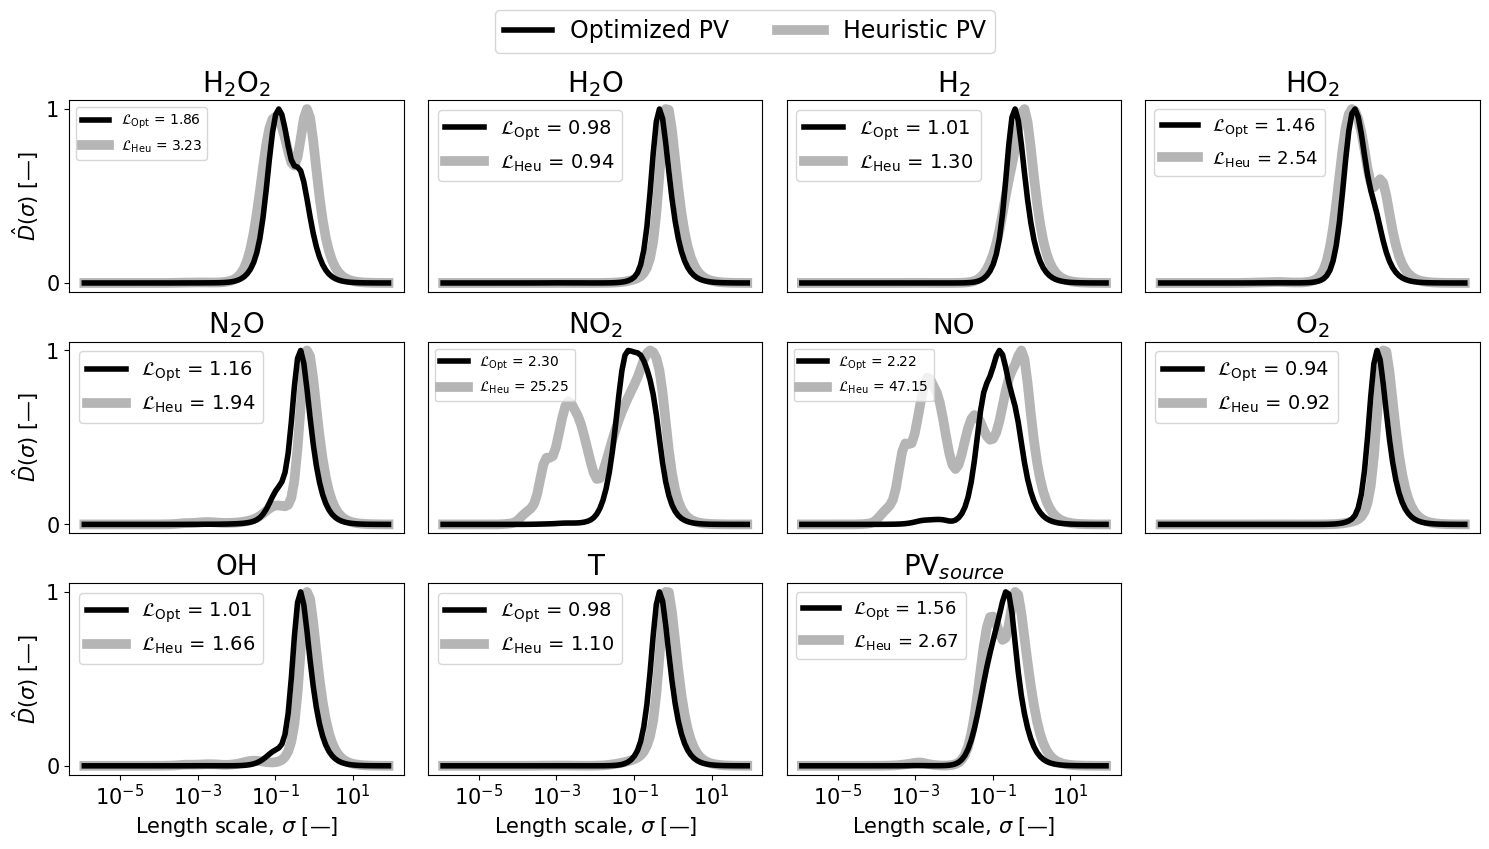

In [8]:
rows, cols = 3,4

save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Comparison Xu vs optimized/Dhat plots - Flamelet/"
name = "Dhat heuristic vs optimized PV - combined - Flamelet - with cost - with = - black.png"
namePdf = "Dhat heuristic vs optimized PV - combined - Flamelet - with cost - with = - black.pdf"

keys = ['H2O2', 'H2O', 'H2', 'HO2', 'N2O', 'NO2', 'NO', 'O2', 'OH', 'T', 'PV1']

fig, axes = plt.subplots(rows, cols, figsize=(15, 8))  # Define the grid
axes = axes.flatten()
for i, key in enumerate(keys):
    ax = axes[i]
    ax.plot(bandwidth_values_optimized_fl, derivative_optimized_fl[key], color = greys(1.0), zorder = 2,
            label=rf'$\mathcal{{L}}_{{\mathrm{{Opt}}}}$ = {costsOptimized_fl[i]:.2f}', linewidth = 4)
    ax.plot(bandwidth_values_heuristic_fl, derivative_heuristic_fl[key], color = greys(0.4), zorder = 1,
            label=rf'$\mathcal{{L}}_{{\mathrm{{Heu}}}}$ = {costsHeuristic_fl[i]:.2f}', linewidth = 7, linestyle = "-")
    ax.set_xscale("log")
    if(i>len(keys)-cols):
        ax.tick_params(axis="x", labelsize=15)
        ax.set_xlabel(r"Length scale, $\sigma$"+ " [\u2014]", fontsize = 15)
    else:
        ax.set_xticks([])
    if(i%cols == 0):
        ax.set_yticks([0, 1])
        ax.set_ylabel(r"$\hat{D}(\sigma)$" + " [\u2014]", fontsize = 15)
    else:
        ax.set_yticks([])
    ax.tick_params(axis="y", labelsize=15)

    if(key in ["PV1", "HO2"]):
         ax.legend(fontsize = 13)
    elif(key in ["NO2", "NO","H2O2"]):
         ax.legend(fontsize = 10)
    else:
         ax.legend(fontsize = 14)


    key = key.replace("2", "$_{2}$").replace("1", "$_{source}$")
    ax.set_title(rf"{key}", fontsize=20)

for j in range(len(keys), len(axes)): #disables axes of plots not used
    axes[j].axis("off")

handles, _ = axes[0].get_legend_handles_labels()
labels = ["Optimized PV", "Heuristic PV"]

fig.legend(
    handles=handles,
    labels = labels,
    fontsize=17,
    loc="upper center",
    ncol=2,
    bbox_to_anchor=(0.5, 1.07)
)

plt.tight_layout()
if(save):
        plt.savefig(f"{pathSave}{name}", dpi = 300, bbox_inches="tight")
        plt.savefig(f"{pathSave}{namePdf}", bbox_inches="tight")
plt.show()

<h3> Autoignition

In [7]:
variance_optimized_0D = np.load(f"{path_variance}{name_optimized_0D}", allow_pickle=True).item()
variance_heuristic_0D = np.load(f"{path_variance}{name_heuristic_0D}", allow_pickle=True).item()

(derivative_optimized_0D, bandwidth_values_optimized_0D, max_derivative_optimized_0D) = normalized_variance_derivative(variance_optimized_0D)
(derivative_heuristic_0D, bandwidth_values_heuristic_0D, max_derivative_heuristic_0D) = normalized_variance_derivative(variance_heuristic_0D)

costsOptimized_0D = cost_function_normalized_variance_derivative(variance_optimized_0D,
                                                            penalty_function=penalty_function,
                                                            power=power,
                                                            vertical_shift=vertical_shift,
                                                            norm=None)
costsHeuristic_0D = cost_function_normalized_variance_derivative(variance_heuristic_0D,
                                                            penalty_function=penalty_function,
                                                            power=power,
                                                            vertical_shift=vertical_shift,
                                                            norm=None)

Combined

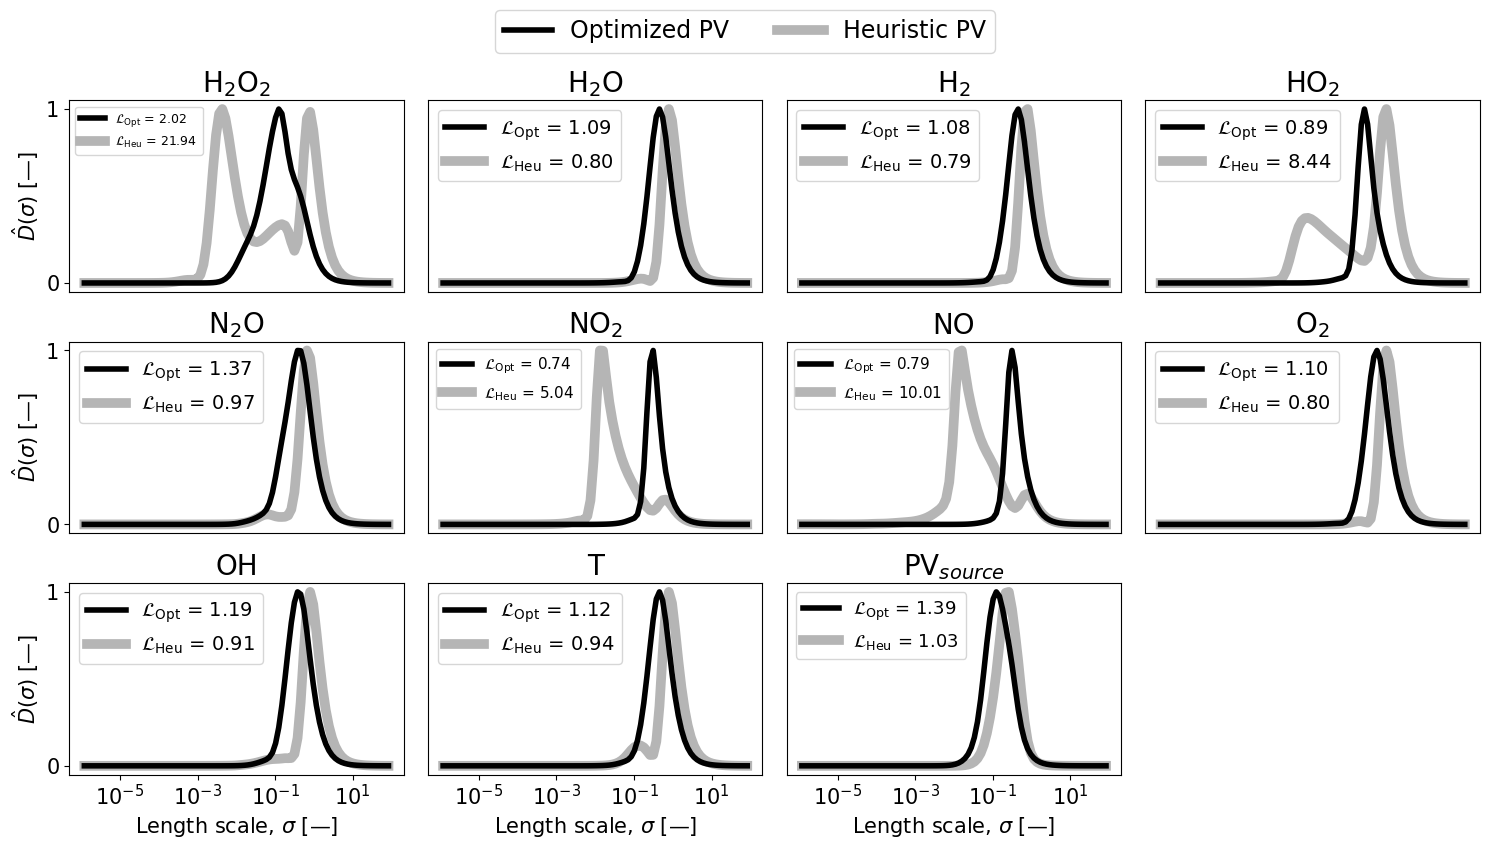

In [9]:
rows, cols = 3,4

save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Comparison Xu vs optimized/Dhat plots - Autoignition/"
name = "Dhat heuristic vs optimized PV - combined - Autoignition - with cost - with = - black.png"
namePdf = "Dhat heuristic vs optimized PV - combined - Autoignition - with cost - with = - black.pdf"

fig, axes = plt.subplots(rows, cols, figsize=(15, 8))  # Define the grid
axes = axes.flatten()
for i, key in enumerate(keys):
    ax = axes[i]
    ax.plot(bandwidth_values_optimized_0D, derivative_optimized_0D[key], color = greys(1.0), zorder = 2,
            label=rf'$\mathcal{{L}}_{{\mathrm{{Opt}}}}$ = {costsOptimized_0D[i]:.2f}', linewidth = 4)
    ax.plot(bandwidth_values_heuristic_0D, derivative_heuristic_0D[key], color = greys(0.4), zorder = 1,
            label=rf'$\mathcal{{L}}_{{\mathrm{{Heu}}}}$ = {costsHeuristic_0D[i]:.2f}', linewidth = 7, linestyle = "-")
    ax.set_xscale("log")
        
    if(i>len(keys)-cols):
        ax.tick_params(axis="x", labelsize=15)
        ax.set_xlabel(r"Length scale, $\sigma$"+ " [\u2014]", fontsize = 15)
    else:
        ax.set_xticks([])
    if(i%cols == 0):
        ax.set_yticks([0, 1])
        ax.set_ylabel(r"$\hat{D}(\sigma)$" + " [\u2014]", fontsize = 15)
    else:
        ax.set_yticks([])
    ax.tick_params(axis="y", labelsize=15)

    if(key in ["PV1"]):
         ax.legend(fontsize = 13)
    elif(key in ["NO", "NO2"]):
         ax.legend(fontsize = 11)
    elif(key in ["H2O2"]):
         ax.legend(fontsize = 9)
    else:
         ax.legend(fontsize = 14)

    key = key.replace("2", "$_{2}$").replace("1", "$_{source}$")

    ax.set_title(rf"{key}", fontsize=20)

    

for j in range(len(keys), len(axes)): #disables axes of plots not used
    axes[j].axis("off")

handles, _ = axes[0].get_legend_handles_labels()
labels = ["Optimized PV", "Heuristic PV"]

fig.legend(
    handles=handles,
    labels = labels,
    fontsize=17,
    loc="upper center",
    ncol=2,
    bbox_to_anchor=(0.5, 1.07)
)

plt.tight_layout()
if(save):
        plt.savefig(f"{pathSave}{name}", dpi = 300, bbox_inches="tight")
        plt.savefig(f"{pathSave}{namePdf}", bbox_inches="tight")
plt.show()

Autoignition: show evolution from heuristic to optimized with different QoIs

C:\Windows\Temp\ipykernel_18048\3733873131.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  greys = cm.get_cmap('Greys')


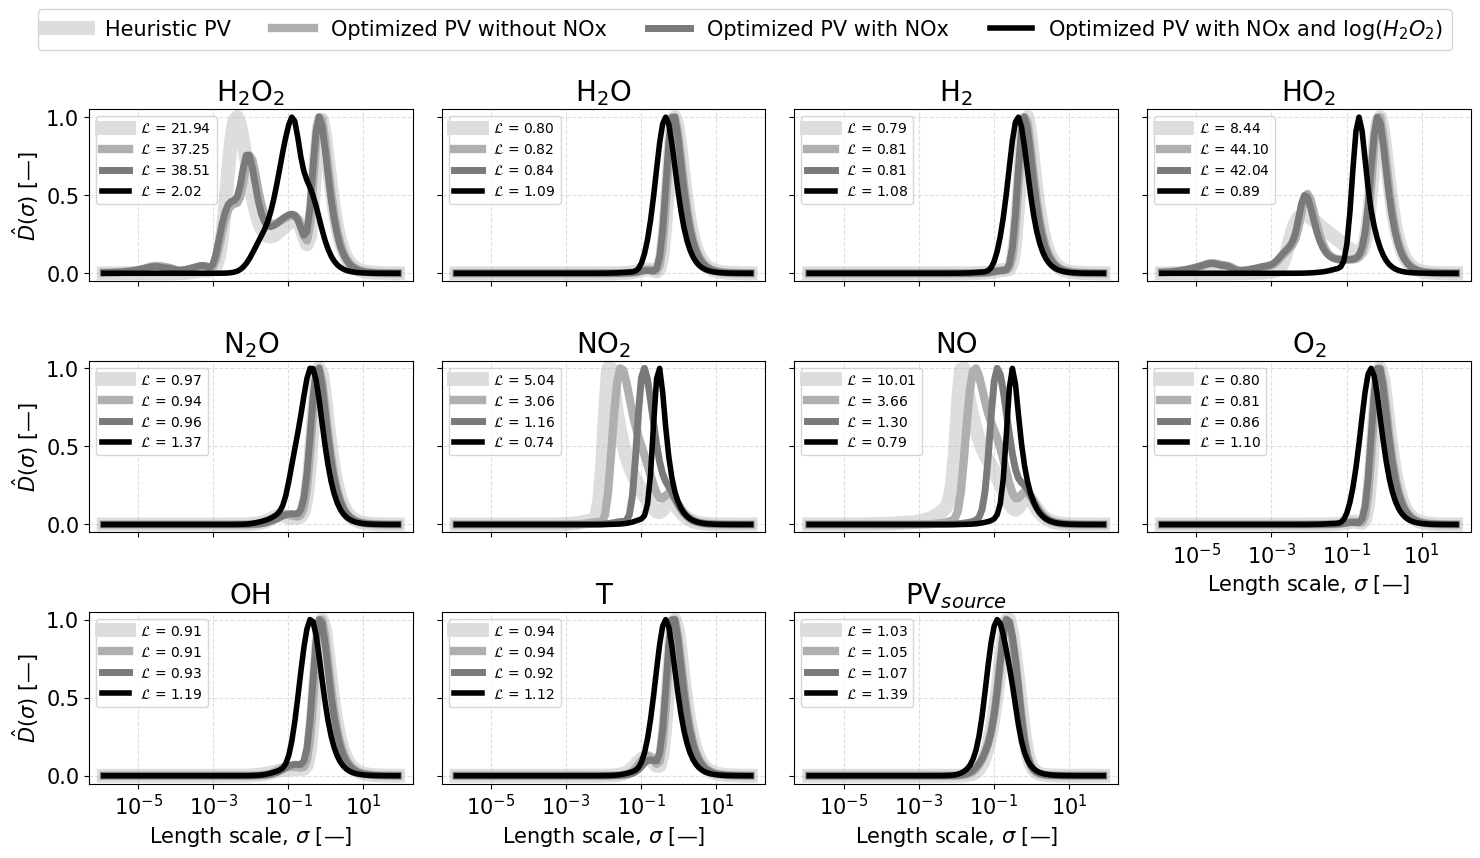

In [10]:
save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Comparison Xu vs optimized/Dhat plots - Autoignition/"
name = "Dhat heuristic vs optimized PV - overview with-without NOx and log(H2O2) - all species - with L.png"
namePdf = "Dhat heuristic vs optimized PV - overview with-without NOx and log(H2O2) - all species - with L.pdf"

path_variance = "data-files/costs/"

name_withNOx = "variance_Tr0D-2h_s0-bw_-6_2_100-dataset_autoignition.npy"


penalty_function = 'log-sigma-over-peak'
power = 4
vertical_shift = 1

variance_withNOx = np.load(f"{path_variance}{name_withNOx}", allow_pickle=True).item()

(derivative_withNOx, bandwidth_values_withNOx, max_derivative_withNOx) = normalized_variance_derivative(variance_withNOx)

keys = ['H2O2', 'H2O', 'H2', 'HO2', 'N2O', 'NO2', 'NO', 'O2', 'OH', 'T', 'PV1']

costsWithNOx = cost_function_normalized_variance_derivative(variance_withNOx,
                                                            penalty_function=penalty_function,
                                                            power=power,
                                                            vertical_shift=vertical_shift,
                                                            norm=None)



seed_2v = 0
name_withoutNOx = f"variance_Tr0D-2v_s{seed_2v}-bw_-6_2_100-dataset_autoignition.npy"

variance_withoutNOx = np.load(f"{path_variance}{name_withoutNOx}", allow_pickle=True).item()

(derivative_withoutNOx, bandwidth_values_withoutNOx, max_derivative_withoutNOx) = normalized_variance_derivative(variance_withoutNOx)

costsWithoutNOx = cost_function_normalized_variance_derivative(variance_withoutNOx,
                                                            penalty_function=penalty_function,
                                                            power=power,
                                                            vertical_shift=vertical_shift,
                                                            norm=None)

import matplotlib.cm as cm

# Get shades of grey from black (0) to white (1)
greys = cm.get_cmap('Greys')

rows = 3
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(15, 8))
axes = axes.flatten()

for i, key in enumerate(keys):
    ax = axes[i]

    ax.plot(bandwidth_values_heuristic_0D, derivative_heuristic_0D[key],
            linewidth=10, linestyle="-", label=f"$\mathcal{{L}}$ = {costsHeuristic_0D[i]:.2f}", color=greys(0.23), zorder=1)
    ax.plot(bandwidth_values_withoutNOx, derivative_withoutNOx[key],
            linewidth=6, label=f"$\mathcal{{L}}$ = {costsWithoutNOx[i]:.2f}", color=greys(0.42), linestyle="-", zorder=2)
    ax.plot(bandwidth_values_withNOx, derivative_withNOx[key],
            linewidth=5, label=f"$\mathcal{{L}}$ = {costsWithNOx[i]:.2f}", color=greys(0.6), zorder=3)
    ax.plot(bandwidth_values_optimized_0D, derivative_optimized_0D[key],
            linewidth=4, label=f"$\mathcal{{L}}$ = {costsOptimized_0D[i]:.2f}", color=greys(1.0), zorder=4)
    ax.set_xscale("log")
    ax.set_title(key.replace("2", "$_2$").replace("1", "$_{source}$"), fontsize=20)
    ax.grid(True, linestyle='--', alpha=0.4)

    ax.legend(loc = "upper left")

    if i == 0:
        handles, labels = ax.get_legend_handles_labels()
    
    if(i>=len(keys)-cols):
        ax.tick_params(axis="x", labelsize=15)
        ax.set_xlabel(r"Length scale, $\sigma$"+ " [\u2014]", fontsize = 15)
    else:
        ax.tick_params(labelbottom=False)
    if(i%cols == 0):
        ax.set_yticks([0, 0.5, 1])
        ax.set_ylabel(r"$\hat{D}(\sigma)$" + " [\u2014]", fontsize = 15)
    else:
        ax.set_yticks([0, 0.5, 1])
        ax.tick_params(labelleft=False)
    ax.tick_params(axis="y", labelsize=15)

for j in range(len(keys), len(axes)): #disables axes of plots not used
    axes[j].axis("off")

heuristic_handle = mlines.Line2D([], [], color=greys(0.23), linewidth=10, linestyle='-', label='Heuristic PV')
withoutNOx_handle = mlines.Line2D([], [], color=greys(0.42), linewidth=6, linestyle='-', label='Optimized PV without NOx')
withNOx_handle = mlines.Line2D([], [], color=greys(0.6), linewidth=5, linestyle='-', label='Optimized PV with NOx')
optimized_handle = mlines.Line2D([], [], color=greys(1.0), linewidth=4, linestyle='-', label='Optimized PV with NOx and log($H_2O_2$)')

fig.legend(handles=[heuristic_handle, withoutNOx_handle, withNOx_handle, optimized_handle], loc='upper center', fontsize=15, ncol=4, bbox_to_anchor=(0.5, 1.08))

plt.tight_layout()
if save:
    plt.savefig(pathSave + name, dpi = 300, bbox_inches = "tight")
    plt.savefig(f"{pathSave}{namePdf}", bbox_inches="tight")
plt.show()

## Dhat curve of log(PVsource) - Autoignition - Heuristic vs optimized PV

In [25]:
name_optimized_0D_logPVsource = "variance_Tr0D-2q_s0-bw_-6_2_100-dataset_autoignition_logPVsource.npy"
name_heuristic_0D_logPVsource = "variance_Xu-bw_-6_2_100-dataset_autoignition_logPVsource.npy"

variance_optimized_0D_logPVsource = np.load(f"{path_variance}{name_optimized_0D_logPVsource}", allow_pickle=True).item()
variance_heuristic_0D_logPVsource = np.load(f"{path_variance}{name_heuristic_0D_logPVsource}", allow_pickle=True).item()

(derivative_optimized_0D_logPVsource, bandwidth_values_optimized_0D_logPVsource, max_derivative_optimized_0D_logPVsource) = normalized_variance_derivative(variance_optimized_0D_logPVsource)
(derivative_heuristic_0D_logPVsource, bandwidth_values_heuristic_0D_logPVsource, max_derivative_heuristic_0D_logPVsource) = normalized_variance_derivative(variance_heuristic_0D_logPVsource)

costsOptimized_0D_logPVsource = cost_function_normalized_variance_derivative(variance_optimized_0D_logPVsource,
                                                            penalty_function=penalty_function,
                                                            power=power,
                                                            vertical_shift=vertical_shift,
                                                            norm=None)
costsHeuristic_0D_logPVsource = cost_function_normalized_variance_derivative(variance_heuristic_0D_logPVsource,
                                                            penalty_function=penalty_function,
                                                            power=power,
                                                            vertical_shift=vertical_shift,
                                                            norm=None)

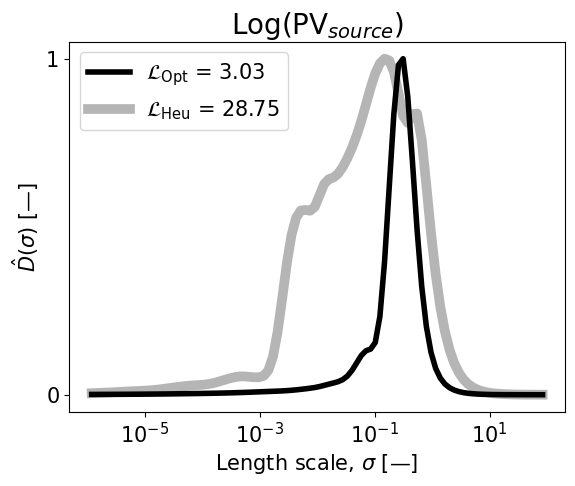

In [54]:
keys = ['logPVsource']

save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Comparison Xu vs optimized/Dhat plots - Autoignition/"

for key in keys:
    name = f"Dhat curve - Autoignition - log(PVsource).png"

    plt.figure()
    plt.plot(bandwidth_values_optimized_0D_logPVsource, derivative_optimized_0D_logPVsource[key], color = greys(1.0), zorder = 2,
            label=f'$\mathcal{{L}}_{{\mathrm{{Opt}}}}$ = {costsOptimized_0D_logPVsource[0]:.2f}', linewidth = 4)
    plt.plot(bandwidth_values_heuristic_0D_logPVsource, derivative_heuristic_0D_logPVsource[key], color = greys(0.4), zorder = 1,
            label=f'$\mathcal{{L}}_{{\mathrm{{Heu}}}}$ = {costsHeuristic_0D_logPVsource[0]:.2f}', linewidth = 7, linestyle = "-")
    plt.xlabel(r"Length scale, $\sigma$"+ " [\u2014]", fontsize = 15)
    plt.ylabel(r"$\hat{D}(\sigma)$" + " [\u2014]", fontsize = 15)
    plt.xscale("log")
    plt.xticks(fontsize = 15)
    plt.yticks([0, 1], fontsize = 15)
    plt.title(f"Log(PV$_{{source}}$)", fontsize = 20)
    plt.legend(fontsize = 15)
    if(save):
        plt.savefig(f"{pathSave}{name}", dpi = 300, bbox_inches="tight")
    plt.show()